In [6]:
import json
import requests
import csv
import random
import time
import pandas as pd
import openweathermapy.core as owm
import matplotlib.pyplot as plt
from config import *
from citipy import citipy
from geopy.distance import vincenty

In [2]:
#OpenWeatherMap Settings
owm_settings = {"units": "imperial", "appid": api_key}

#Load OWM city list json file
owm_city_json = json.load(open('city.list.json', encoding='utf8'))

In [3]:
#WORKING#

city_count = 600
counter = 0

rangeLat = (-90, 90)
rangeLong = (-180, 180)

latitudes = []
longitudes = []

cities = []

print('Randomly selecting 600 cities...')
while counter != city_count:
    rand_lat = round(random.uniform(*rangeLat), 5)
    rand_long = round(random.uniform(*rangeLong), 5)
    rand_coord = (rand_lat, rand_long)
    city = citipy.nearest_city(rand_lat, rand_long)
    name = city.city_name
    country = city.country_code
    
    city_coord = ''
    for x in owm_city_json:
        if x['name'] == name.title() and x['country'] == country.upper():
            city_coord = (x['coord']['lat'], x['coord']['lon'])
            owm_id = x['id']
            lat = x['coord']['lat']
            long = x['coord']['lon']
            
    if city_coord != '' and owm_id not in cities:
        distance = vincenty(rand_coord, city_coord).miles #using vincenty since it's more accurate than great_circle, errors when handling antipodes is not an issue here since the closest city to any given coord will not be an antipode
        if distance <= 69: #at equator, each line of latitude is approximately 69 miles from the next line, same for longitude.  Eliminating random points that have no nearby city within one degree of lat/long
            cities.append(owm_id)
            counter = counter + 1

            latitudes.append(lat)
            longitudes.append(long)

            
print('...selection complete')

Randomly selecting 600 cities...
...selection complete


In [25]:
#Check generated city list for duplicates
duplicates = pd.Series(cities)
duplicates[duplicates.duplicated()]

Series([], dtype: int64)

In [5]:
#Export generated city list to csv
with open('my_city.list.csv', 'w') as fileout:
    writer = csv.writer(fileout, delimiter=',')
    writer.writerow(cities)

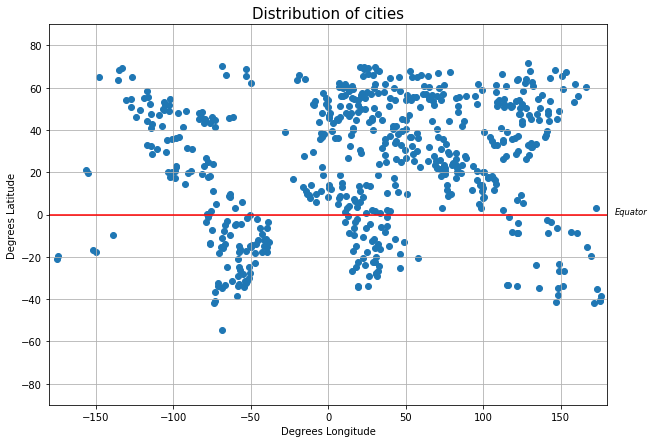

In [4]:
#Plot city locations to verify global distribution and no hidden clusters
plt.figure(figsize=(10,7))

plt.scatter(longitudes, latitudes)
plt.title('Distribution of cities', size='15')
plt.xlim(-180, 180)
plt.xlabel('Degrees Longitude')
plt.ylim(rangeLat)
plt.ylabel('Degrees Latitude')
plt.axhline(y=0, color='r', linestyle='-')
plt.text(185,0,'Equator', size='smaller', style='italic')
plt.grid()
plt.show()

In [7]:
#Retrieve weather data from OpenWeatherMap
counter = 1
data = []

print('---------------------------------\nBeginning Data Retrieval\n---------------------------------')
for city in cities:
    current_weather = owm.get_current(int(city), **owm_settings)
    data.append(current_weather)
    print(f'Processing record {"{0:>3s}".format(str(counter))} of {len(cities)} | {current_weather["name"]}, {current_weather["sys"]["country"]}')
    counter = counter + 1
    time.sleep(1)
    
print('---------------------------------\nData Retrieval Complete\n---------------------------------')

---------------------------------
Beginning Data Retrieval
---------------------------------
Processing record   1 of 600 | Lyngseidet, NO
Processing record   2 of 600 | Sharjah, AE
Processing record   3 of 600 | Bonfim, BR
Processing record   4 of 600 | Dubreka, GN
Processing record   5 of 600 | Cootamundra, AU
Processing record   6 of 600 | Chiang Khong, TH
Processing record   7 of 600 | Big Bend, SZ
Processing record   8 of 600 | Prince Albert, CA
Processing record   9 of 600 | Batagay-Alyta, RU
Processing record  10 of 600 | Dachau, DE
Processing record  11 of 600 | La Orilla, MX
Processing record  12 of 600 | Tarnow, PL
Processing record  13 of 600 | Urusha, RU
Processing record  14 of 600 | Dengfeng, CN
Processing record  15 of 600 | Moroni, KM
Processing record  16 of 600 | Kurilsk, RU
Processing record  17 of 600 | Contamana, PE
Processing record  18 of 600 | Smithers, CA
Processing record  19 of 600 | Vaini, TO
Processing record  20 of 600 | Carmelo, UY
Processing record  21 o

Processing record 185 of 600 | Ariogala, LT
Processing record 186 of 600 | Fukue, JP
Processing record 187 of 600 | Bull Savanna, JM
Processing record 188 of 600 | Jardim, BR
Processing record 189 of 600 | Dombarovskiy, RU
Processing record 190 of 600 | Belaya Gora, RU
Processing record 191 of 600 | Berdigestyakh, RU
Processing record 192 of 600 | Awjilah, LY
Processing record 193 of 600 | Okuchi, JP
Processing record 194 of 600 | Falun, SE
Processing record 195 of 600 | Pudozh, RU
Processing record 196 of 600 | Chor, PK
Processing record 197 of 600 | Cienaga, CO
Processing record 198 of 600 | Paamiut, GL
Processing record 199 of 600 | Xixiang, CN
Processing record 200 of 600 | Kronshtadt, RU
Processing record 201 of 600 | Nova Olimpia, BR
Processing record 202 of 600 | Odesskoye, RU
Processing record 203 of 600 | Doume, CM
Processing record 204 of 600 | Bima, ID
Processing record 205 of 600 | Pangai, TO
Processing record 206 of 600 | Sangmelima, CM
Processing record 207 of 600 | Hilo,

Processing record 373 of 600 | Pampa, US
Processing record 374 of 600 | Alice Springs, AU
Processing record 375 of 600 | Almeirim, BR
Processing record 376 of 600 | Elblag, PL
Processing record 377 of 600 | Nuevo Progreso, MX
Processing record 378 of 600 | Duldurga, RU
Processing record 379 of 600 | Nassau, BS
Processing record 380 of 600 | Tete, MZ
Processing record 381 of 600 | High Prairie, CA
Processing record 382 of 600 | Arnoldstein, AT
Processing record 383 of 600 | Wailuku, US
Processing record 384 of 600 | Gursu, TR
Processing record 385 of 600 | Itamarandiba, BR
Processing record 386 of 600 | Satna, IN
Processing record 387 of 600 | Baiyin, CN
Processing record 388 of 600 | Severodvinsk, RU
Processing record 389 of 600 | Puri, IN
Processing record 390 of 600 | Tacna, PE
Processing record 391 of 600 | Port Hardy, CA
Processing record 392 of 600 | Salvador, BR
Processing record 393 of 600 | Yangambi, CD
Processing record 394 of 600 | Astoria, US
Processing record 395 of 600 | M

Processing record 559 of 600 | Orillia, CA
Processing record 560 of 600 | Huntingdon, CA
Processing record 561 of 600 | Zacualtipan, MX
Processing record 562 of 600 | Hanamaki, JP
Processing record 563 of 600 | Neka, IR
Processing record 564 of 600 | Novovoronezh, RU
Processing record 565 of 600 | Groningen, SR
Processing record 566 of 600 | Ojinaga, MX
Processing record 567 of 600 | Oltu, TR
Processing record 568 of 600 | Tremedal, BR
Processing record 569 of 600 | Poway, US
Processing record 570 of 600 | Makariv, UA
Processing record 571 of 600 | Ous, RU
Processing record 572 of 600 | Idlib, SY
Processing record 573 of 600 | Sisauli, IN
Processing record 574 of 600 | El Paujil, CO
Processing record 575 of 600 | Tevaitoa, PF
Processing record 576 of 600 | Kutum, SD
Processing record 577 of 600 | Correia Pinto, BR
Processing record 578 of 600 | Campeche, MX
Processing record 579 of 600 | Paoua, CF
Processing record 580 of 600 | Bashtanka, UA
Processing record 581 of 600 | Tazovskiy, RU

In [8]:
#Save retrieved OWM data to json file
with open('owm_data.json', 'w') as outfile:  
    json.dump(data, outfile)